In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [2]:
feature_data = pd.read_csv("pca_3.csv")
feature_data = feature_data.drop("Unnamed: 0", axis=1)


print(feature_data)

scaler = StandardScaler()
scaler.fit(feature_data.to_numpy())
scaled_data = scaler.transform(feature_data.to_numpy())

              0         1         2
0     -1.607089  0.977637 -1.438565
1     -1.927880  1.913510 -0.355332
2     -1.535186 -0.575798 -1.292271
3     -2.295617 -0.109649  0.701057
4     -2.332972  1.013812 -0.639852
...         ...       ...       ...
48385 -1.298817  1.778724 -0.262809
48386 -0.645885  1.918875 -0.211133
48387  3.945842  0.205881  2.035792
48388 -0.463106  1.825685  0.406020
48389  2.194011 -0.141042 -1.265682

[48390 rows x 3 columns]


In [3]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 7,
}

In [4]:
inertia = []
silhouette_coef = []
db_index = []

for k in range(1, 11):
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

    if (k != 1):
        db_index.append(davies_bouldin_score(scaled_data, kmeans.labels_))
        silhouette_coef.append(silhouette_score(scaled_data, kmeans.labels_))

1
2
3
4
5
6
7
8
9
10


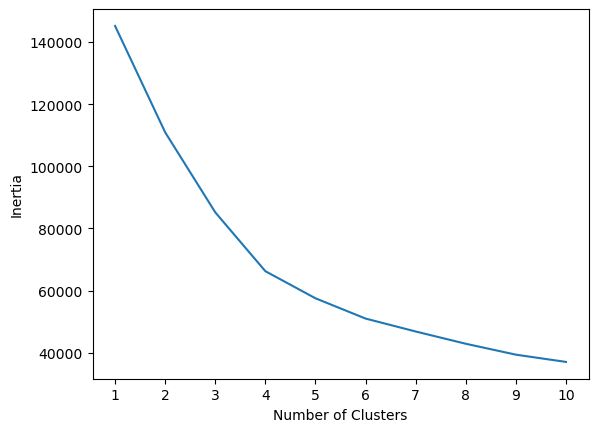

In [5]:
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [6]:
kl = KneeLocator(
    range(1, 11), inertia, curve="convex", direction="decreasing"
)

print(kl.elbow)

4


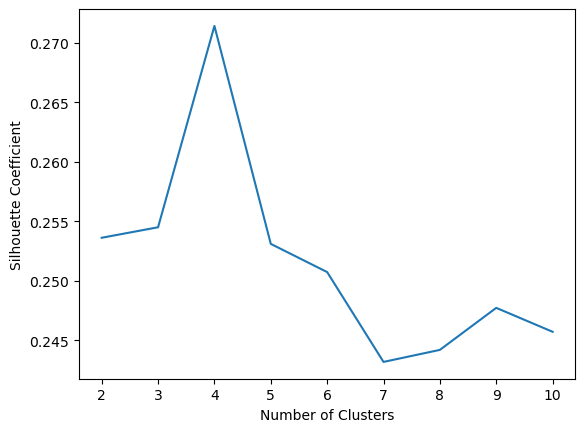

In [7]:
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

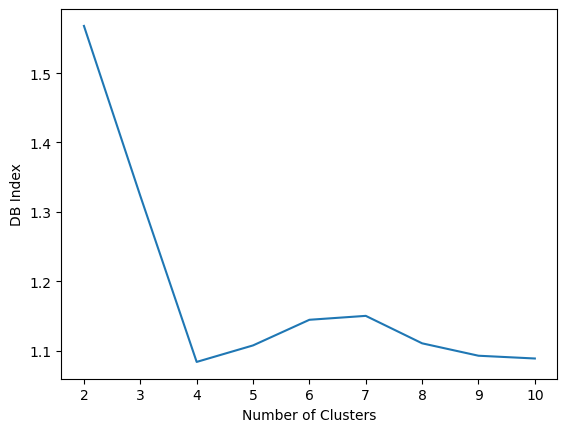

In [8]:
plt.plot(range(2, 11), db_index)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("DB Index")
plt.show()

In [9]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(scaled_data)

kmeans_4_centers = {
    "centers": kmeans.cluster_centers_,
    "labels": kmeans.labels_,
    "inertia": kmeans.inertia_,
    "iterations": kmeans.n_iter_,
    "features": kmeans.n_features_in_,
}

In [10]:
# Clustering Evaluation

db_index = davies_bouldin_score(scaled_data, kmeans.labels_)
print("DB Index: " + str(db_index))

silhouette_coefficient = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Coefficient: " + str(silhouette_coefficient))




DB Index: 1.0835843582139062
Silhouette Coefficient: 0.2713960204351112


In [11]:
def parse_tags(tag):
    tag = tag.strip("[")
    tag = tag.strip("]")
    labels = []
    if ", " in tag: 
        for label in tag.split(", "):
            labels.append(label.strip("'"))
    else:
        labels = [tag.strip("'")]
    return labels

In [12]:
labeled_data = pd.read_csv("single_tags.csv")

In [13]:
tags_represented = {
    0: {},
    1: {},
    2: {},
    3: {},
}

for i in np.unique(kmeans_4_centers["labels"]):
    indices = np.where(kmeans_4_centers["labels"] == i)[0]
    for index in indices:
        for label in parse_tags(labeled_data._get_value(index, "seeds")):
            if  label not in tags_represented[i].keys():
                tags_represented[i].update({label: 1})
            else:
                tags_represented[i][label] += 1

print(tags_represented)

{0: {'aggressive': 99, 'angry': 87, 'angst-ridden': 3, 'confrontational': 3, 'defiant': 16, 'demonic': 2, 'explosive': 11, 'fierce': 174, 'harsh': 24, 'hostile': 2, 'hyper': 31, 'intense': 56, 'manic': 21, 'menacing': 18, 'nihilistic': 3, 'ominous': 14, 'outrageous': 2, 'provocative': 18, 'rebellious': 20, 'reckless': 4, 'savage': 22, 'uncompromising': 3, 'unsettling': 4, 'visceral': 4, 'volatile': 3, 'apocalyptic': 16, 'dark': 86, 'eerie': 47, 'fractured': 5, 'gloomy': 79, 'halloween': 85, 'macabre': 3, 'paranoid': 41, 'scary': 45, 'spooky': 53, 'urgent': 26, 'bitter': 94, 'bleak': 18, 'brittle': 6, 'cold': 66, 'grim': 5, 'lonely': 147, 'nocturnal': 50, 'delicate': 82, 'dreamy': 70, 'ethereal': 66, 'gentle': 121, 'intimate': 109, 'introspective': 66, 'lazy': 290, 'meditative': 38, 'pastoral': 14, 'relaxed': 189, 'reserved': 1, 'restrained': 1, 'soothing': 116, 'sparse': 26, 'acerbic': 4, 'brash': 13, 'ironic': 108, 'sarcastic': 68, 'sardonic': 7, 'satirical': 10, 'wry': 16, 'ambitious

In [14]:
cluster_zero = tags_represented[0]

cluster_zero = dict(sorted(cluster_zero.items(), key=lambda item: item[1]))

tags_0= np.array(list(cluster_zero.keys())).reshape(-1, 1)
occurrences_0 = np.array(list(cluster_zero.values())).reshape(-1, 1)

cluster_zero_occurrences = np.flip(np.hstack((tags_0, occurrences_0)), axis=0)

print(cluster_zero_occurrences)
print(cluster_zero)

[['happy' '303']
 ['lazy' '290']
 ['sexy' '286']
 ['cheerful' '283']
 ['smooth' '275']
 ['fun' '252']
 ['positive' '247']
 ['mellow' '236']
 ['sweet' '214']
 ['light' '213']
 ['romantic' '212']
 ['witty' '210']
 ['silly' '201']
 ['lyrical' '194']
 ['quirky' '190']
 ['sleazy' '190']
 ['optimistic' '189']
 ['erotic' '189']
 ['relaxed' '189']
 ['humorous' '186']
 ['playful' '181']
 ['uplifting' '179']
 ['lush' '178']
 ['fierce' '174']
 ['bittersweet' '172']
 ['bright' '170']
 ['sentimental' '168']
 ['whimsical' '164']
 ['thoughtful' '158']
 ['warm' '158']
 ['sensual' '156']
 ['calm' '154']
 ['nostalgic' '153']
 ['soft' '150']
 ['lonely' '147']
 ['tender' '146']
 ['exotic' '146']
 ['spiritual' '145']
 ['energetic' '144']
 ['driving' '130']
 ['wistful' '126']
 ['quiet' '123']
 ['gentle' '121']
 ['lively' '120']
 ['serious' '117']
 ['soothing' '116']
 ['reflective' '114']
 ['sad' '110']
 ['intimate' '109']
 ['sexual' '108']
 ['ironic' '108']
 ['eccentric' '103']
 ['gritty' '102']
 ['poignant

In [15]:
cluster_one = tags_represented[1]

cluster_one = dict(sorted(cluster_one.items(), key=lambda item: item[1]))

tags_1= np.array(list(cluster_one.keys())).reshape(-1, 1)
occurrences_1 = np.array(list(cluster_one.values())).reshape(-1, 1)


cluster_one_occurrences = np.flip(np.hstack((tags_1, occurrences_1)), axis=0)

print(cluster_one_occurrences)


[['aggressive' '382']
 ['sleazy' '354']
 ['angry' '343']
 ['epic' '315']
 ['technical' '308']
 ['energetic' '256']
 ['powerful' '240']
 ['intense' '234']
 ['gloomy' '203']
 ['uplifting' '191']
 ['gritty' '189']
 ['dark' '172']
 ['dramatic' '166']
 ['hypnotic' '164']
 ['cold' '164']
 ['euphoric' '162']
 ['atmospheric' '156']
 ['exotic' '156']
 ['martial' '153']
 ['driving' '149']
 ['erotic' '146']
 ['optimistic' '143']
 ['lyrical' '139']
 ['trippy' '137']
 ['positive' '136']
 ['spooky' '135']
 ['fun' '133']
 ['nostalgic' '130']
 ['bitter' '130']
 ['harsh' '128']
 ['warm' '127']
 ['bittersweet' '124']
 ['eerie' '123']
 ['happy' '121']
 ['halloween' '121']
 ['dreamy' '115']
 ['cheerful' '114']
 ['light' '112']
 ['organic' '112']
 ['exciting' '111']
 ['passionate' '111']
 ['sentimental' '110']
 ['sweet' '109']
 ['romantic' '108']
 ['spacey' '107']
 ['serious' '105']
 ['lush' '105']
 ['strong' '101']
 ['sad' '101']
 ['sexy' '99']
 ['scary' '99']
 ['fierce' '99']
 ['mysterious' '93']
 ['monu

In [16]:
cluster_two = tags_represented[2]

cluster_two = dict(sorted(cluster_two.items(), key=lambda item: item[1]))

tags_2= np.array(list(cluster_two.keys())).reshape(-1, 1)
occurrences_2 = np.array(list(cluster_two.values())).reshape(-1, 1)


cluster_two_occurrences = np.flip(np.hstack((tags_2, occurrences_2)), axis=0)

print(cluster_two_occurrences)

[['sexy' '245']
 ['smooth' '228']
 ['erotic' '213']
 ['sleazy' '168']
 ['lyrical' '165']
 ['sensual' '160']
 ['fierce' '159']
 ['gloomy' '157']
 ['exotic' '155']
 ['angry' '151']
 ['gritty' '149']
 ['lush' '147']
 ['epic' '137']
 ['energetic' '136']
 ['positive' '132']
 ['hypnotic' '131']
 ['dark' '128']
 ['serious' '127']
 ['silly' '126']
 ['fun' '125']
 ['aggressive' '122']
 ['organic' '120']
 ['uplifting' '119']
 ['trippy' '113']
 ['spiritual' '112']
 ['quirky' '107']
 ['cold' '106']
 ['witty' '105']
 ['relaxed' '105']
 ['intense' '105']
 ['nostalgic' '104']
 ['playful' '104']
 ['dramatic' '104']
 ['mysterious' '101']
 ['martial' '99']
 ['light' '98']
 ['technical' '98']
 ['warm' '98']
 ['sexual' '96']
 ['powerful' '94']
 ['bitter' '92']
 ['lazy' '89']
 ['optimistic' '88']
 ['spooky' '88']
 ['eerie' '88']
 ['flashy' '86']
 ['mystical' '84']
 ['cheerful' '83']
 ['spacey' '82']
 ['atmospheric' '80']
 ['driving' '79']
 ['halloween' '79']
 ['dreamy' '77']
 ['humorous' '76']
 ['euphoric'

In [17]:
cluster_three = tags_represented[3]

cluster_three = dict(sorted(cluster_three.items(), key=lambda item: item[1]))

tags_3= np.array(list(cluster_three.keys())).reshape(-1, 1)
occurrences_3 = np.array(list(cluster_three.values())).reshape(-1, 1)


cluster_three_occurrences = np.flip(np.hstack((tags_3, occurrences_3)), axis=0)

print(cluster_three_occurrences)

[['meditative' '299']
 ['sacred' '280']
 ['peaceful' '266']
 ['gentle' '241']
 ['quiet' '240']
 ['romantic' '224']
 ['eerie' '203']
 ['mysterious' '201']
 ['soothing' '178']
 ['spiritual' '176']
 ['poignant' '175']
 ['spooky' '164']
 ['sentimental' '154']
 ['intimate' '148']
 ['ethereal' '146']
 ['lonely' '144']
 ['soft' '142']
 ['mystical' '138']
 ['scary' '133']
 ['light' '129']
 ['calm' '128']
 ['tender' '124']
 ['delicate' '124']
 ['relaxed' '122']
 ['atmospheric' '120']
 ['lush' '117']
 ['organic' '115']
 ['warm' '113']
 ['dramatic' '113']
 ['wistful' '112']
 ['thoughtful' '107']
 ['nostalgic' '102']
 ['reflective' '101']
 ['cold' '101']
 ['nocturnal' '100']
 ['melancholy' '99']
 ['earthy' '98']
 ['hypnotic' '96']
 ['mellow' '91']
 ['introspective' '91']
 ['sensual' '83']
 ['lazy' '83']
 ['lively' '82']
 ['bittersweet' '80']
 ['dreamy' '80']
 ['exotic' '79']
 ['spacey' '77']
 ['dark' '77']
 ['martial' '76']
 ['lyrical' '76']
 ['sad' '74']
 ['gloomy' '74']
 ['brooding' '73']
 ['ele

In [21]:
kmeans_3_labeled = pd.read_csv("single_tags.csv")
kmeans_3_labeled = kmeans_3_labeled.drop("Unnamed: 0", axis=1)

print(kmeans_3_labeled.shape)
kmeans_3_labeled.insert(len(kmeans_3_labeled.columns), "Labels", kmeans_4_centers["labels"], True)

print(kmeans_3_labeled.shape)

kmeans_3_labeled.to_csv("kmeans_pca_3.csv")

(48390, 22)
(48390, 23)


In [34]:
#Song Sampling

c1_idx = np.where(kmeans_3_centers["labels"] == 0)[0]
c2_idx = np.where(kmeans_3_centers["labels"] == 1)[0]
c3_idx = np.where(kmeans_3_centers["labels"] == 2)[0]

c1_sample = np.random.choice(c1_idx, size=10, replace=False)
c2_sample = np.random.choice(c2_idx, size=10, replace=False)
c3_sample = np.random.choice(c3_idx, size=10, replace=False)

print("Cluster 1")
print(kmeans_3_labeled.loc[c1_sample])
print("Cluster 2")
print(kmeans_3_labeled.loc[c2_sample])
print("Cluster 3")
print(kmeans_3_labeled.loc[c3_sample])

Cluster 1
       Unnamed: 0                         track                     artist  \
5757         8735      Aliveralungakidneyathumb            The pAper chAse   
40424       53222  Show Me What I'm Looking For              Carolina Liar   
38934       51644                   Los Piratas  Los Auténticos Decadentes   
28736       39624             Kryptonite (Live)               3 Doors Down   
26031       36457                      I Run It                      Ciara   
11360       16983               Satta Massagana             Ernest Ranglin   
28922       39821              Pollinating Toes                 Sean Hayes   
38602       51291        What Shall We Do Next?                     Club 8   
9595        14539                  Make or Take                       Nine   
22922       32724                   Lose Myself           Marsha Ambrosius   

                seeds              spotify_id  danceability  energy  key  \
5757        ['scary']  1jY9LcjSKmvQ6iGxchj31e         0